# Project Graphs and Matching
## Subject
You must:
1. Find a dataset... Then find a relevant question or hypothesis about the dataset that would require a clustering or a graph construction to answer
2. Generate a Graph describing compatibilities between datapoints
So maby we should:
    - quantify the non quantitatives variables
    - normalize and / or weight (or doing dimensionnality reduction)
    - remove useless
    - create a distance
    - set a treshold
    - build edges
3. Return a clustering on the given datapoints to answer the question / validate hypothesis


## The dataset
### The generation
The generation of the dataset has been done through the spotify python API, see the Dataset-generation.ipynb notebook in order to do the same

### Loading the dataset

In [1]:
import pandas as pd

In [2]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
df = pd.read_csv("./datasets/playlist-gabriel.csv")
df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,uri,track_href,analysis_url,duration_ms,time_signature,added_at,song_title,artists,genres,principal_genre
0,0,0.661,0.765,2,-8.818,1,0.0297,0.0757,0.8010,0.0919,...,spotify:track:38CngZw3TDi2XDCQPMKHJR,https://api.spotify.com/v1/tracks/38CngZw3TDi2...,https://api.spotify.com/v1/audio-analysis/38Cn...,228293,4,2020-04-07T16:07:14Z,A Sheltered Place - Phaeleh Remix,"Way Out West,Phaeleh","['classic progressive house', 'nu skool breaks...",house
1,1,0.728,0.784,8,-12.477,1,0.0414,0.1030,0.8480,0.0858,...,spotify:track:6YJ9z4IInxfJWsjc6ADtV2,https://api.spotify.com/v1/tracks/6YJ9z4IInxfJ...,https://api.spotify.com/v1/audio-analysis/6YJ9...,377919,3,2020-04-07T13:40:07Z,Prelusion,"Mark Tarmonea,Yannek Maunz",['german house'],house
2,2,0.725,0.742,0,-8.646,1,0.0328,0.0887,0.8100,0.1070,...,spotify:track:4isQapTCsf1TvF9RkzfrCG,https://api.spotify.com/v1/tracks/4isQapTCsf1T...,https://api.spotify.com/v1/audio-analysis/4isQ...,277073,4,2020-04-07T09:13:47Z,Odyssee - Pt. 2,BLR,"['dutch edm', 'house']",house
3,3,0.689,0.810,8,-6.621,0,0.0464,0.0203,0.9010,0.1390,...,spotify:track:0oB0mWnbRYNsC2CicOkXZL,https://api.spotify.com/v1/tracks/0oB0mWnbRYNs...,https://api.spotify.com/v1/audio-analysis/0oB0...,407803,4,2020-04-06T14:33:04Z,GUFM - Folamour Remix,"Mangabey,Folamour",[],other
4,4,0.946,0.493,8,-9.654,1,0.0509,0.1620,0.2970,0.0875,...,spotify:track:0aKoR2iMGuqAUBBCdRwII8,https://api.spotify.com/v1/tracks/0aKoR2iMGuqA...,https://api.spotify.com/v1/audio-analysis/0aKo...,270000,4,2020-04-04T12:08:27Z,Prettiest Virgin (Radio Edit),Agar Agar,"['electronica', 'french indie pop', 'french in...",pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,0.692,0.626,11,-11.361,0,0.0637,0.0432,0.7970,0.1100,...,spotify:track:4bkTaAK3tvBi7M9S6UEyy2,https://api.spotify.com/v1/tracks/4bkTaAK3tvBi...,https://api.spotify.com/v1/audio-analysis/4bkT...,353541,4,2016-12-28T16:20:11Z,StillDreaming,Hypnagog,"['ambient psychill', 'deep psytrance']",techno
362,2,0.489,0.571,10,-11.268,0,0.0933,0.1480,0.6660,0.1830,...,spotify:track:6H0HOzCvYYbzdhhrOVBzxb,https://api.spotify.com/v1/tracks/6H0HOzCvYYbz...,https://api.spotify.com/v1/audio-analysis/6H0H...,262139,1,2016-12-28T16:20:11Z,FunkDiddle,Hypnagog,"['ambient psychill', 'deep psytrance']",techno
363,3,0.700,0.581,6,-7.116,1,0.1500,0.3580,0.0539,0.0825,...,spotify:track:3ndu6BpfkiGE4m0BboNUHv,https://api.spotify.com/v1/tracks/3ndu6BpfkiGE...,https://api.spotify.com/v1/audio-analysis/3ndu...,277385,4,2016-12-28T14:29:04Z,Tempo,"Ondubground,Biga Ranx","['dub reggae', 'electro dub', 'french dub']",reggae
364,4,0.638,0.724,6,-7.291,1,0.0270,0.0206,0.5250,0.1390,...,spotify:track:5MFtsrwzB0SoZzp2QvaSmF,https://api.spotify.com/v1/tracks/5MFtsrwzB0So...,https://api.spotify.com/v1/audio-analysis/5MFt...,243016,4,2016-12-28T14:28:35Z,Because,Ondubground,"['dub reggae', 'electro dub', 'french dub']",reggae


### Explanation of the fields
Nearly every fields explanations can be found at this address: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

### Data exploration
#### Imports
let's import some usefull libraries to dig in the data

In [4]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#### Utils
Let's create some function to plot the data correctly


In [5]:
def my_radarplot(categories: list, values: list, max_value: float=1.0, number_of_ticks: int=4, ticksize: int=8) :
    if number_of_ticks <= 0:
        # avoiding is a division by zero
        return
    
    # number of variable
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values += values[:1]
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    for tick in range(number_of_ticks):
        ticknumbers = [x / number_of_ticks for x in range(1, number_of_ticks)]
        ticklabels = [f"{x:.2f}" for x in ticknumbers]
        
    plt.yticks(ticknumbers, ticklabels, color="grey", size=ticksize)
    plt.ylim(0, max_value)
 
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)



#### Determine a listener profile
Let's take the average of all the interresting features of my playlist and see if we can profile a "listening mood"

In [6]:
interestingColumns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
df_my_profile_mean = df[interestingColumns].mean()

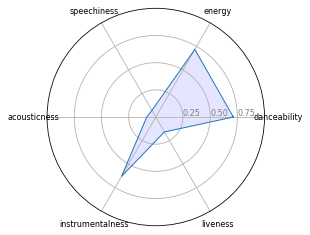

In [7]:
my_radarplot(df_my_profile_mean.keys(), df_my_profile_mean[:].tolist())

We can safely say that I do not listen to speech only podcast on spotify

#### How are distributed the music genres I listen to ?

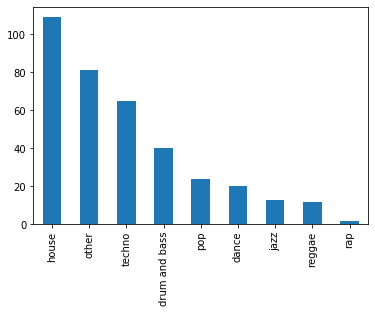

In [8]:
#df_principal_genres = df['principal_genre']
#df_principal_genres.value_counts().plot()

df_principal_genres = df['principal_genre']
df_principal_genres.value_counts().plot(kind="bar")


In [9]:
principal_genres = df['principal_genre'].value_counts().keys().values
principal_genres

array(['house', 'other', 'techno', 'drum and bass', 'pop', 'dance',
       'jazz', 'reggae', 'rap'], dtype=object)


### What can we wonder ?
The question now could be: To what extent these features (liveness, speechiness, ...) may represent the genre ?

## Building a graph
### Build the nodes

util function to display the results of the graph creation functions

In [10]:
from itertools import islice

# this is to display only; source: https://stackoverflow.com/questions/7971618/python-return-first-n-keyvalue-pairs-from-dict
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

##### Quantify non quantitatives variables

eg: turning songs name as name of the nodes, and assigning them numbers to retrieve the songs names afterward

In [11]:
# The goal here is to assign a number to each song in order to build the graph.
graph_nodes_song_titles = {index:row['song_title'] for (index, row) in df.iterrows()}
graph_nodes_song_genres = {index:row['principal_genre'] for (index, row) in df.iterrows()}

# display 5 first to verify the shape and the content
for i in range(5):
    print(f"Node: {i} with genre: {graph_nodes_song_genres[i]} has the name: {graph_nodes_song_titles[i]}")

Node: 0 with genre: house has the name: A Sheltered Place - Phaeleh Remix
Node: 1 with genre: house has the name: Prelusion
Node: 2 with genre: house has the name: Odyssee - Pt. 2
Node: 3 with genre: other has the name: GUFM - Folamour Remix
Node: 4 with genre: pop has the name: Prettiest Virgin (Radio Edit)


##### Setting the values of the nodes

Setting a value to each of the nodes designated by a number (index) as done in the previous cell

In [12]:
# Taking some interesting columns values as numpy arrays for each node
graph_nodes_values = {index:row[interestingColumns].values for (index, row) in df.iterrows()}

# display 5 first to verify the shape and the content
for i in range(5):
    print(f"Node: {i} with genre: {graph_nodes_song_genres[i]} has the name: {graph_nodes_song_titles[i]} with values: {graph_nodes_values[i]}")

Node: 0 with genre: house has the name: A Sheltered Place - Phaeleh Remix with values: [0.6609999999999999 0.765 0.0297 0.0757 0.8009999999999999 0.0919]
Node: 1 with genre: house has the name: Prelusion with values: [0.728 0.784 0.0414 0.10300000000000001 0.848 0.0858]
Node: 2 with genre: house has the name: Odyssee - Pt. 2 with values: [0.725 0.742 0.0328 0.0887 0.81 0.107]
Node: 3 with genre: other has the name: GUFM - Folamour Remix with values: [0.6890000000000001 0.81 0.0464 0.0203 0.9009999999999999 0.139]
Node: 4 with genre: pop has the name: Prettiest Virgin (Radio Edit) with values: [0.946 0.493 0.0509 0.162 0.297 0.0875]


### create a distance


In [13]:
import numpy as np

# a and b are both numpy arrays
def distance_euclidian(a, b):
    # addition of the squares of the substraction of each element of b and a
    return np.sum((b - a) ** 2)
    
# let's test this distance over two arbitrarily chosen nodes
a = 1
b = 2

print(f"a node song: {graph_nodes_song_titles[a]}\twith genre: {graph_nodes_song_genres[a]}\t| values: {graph_nodes_values[a]}")
print(f"b node song: {graph_nodes_song_titles[b]}\twith genre: {graph_nodes_song_genres[b]}\t| values: {graph_nodes_values[b]}")
print(f"with euclidian distance: {distance_euclidian(graph_nodes_values[a], graph_nodes_values[b])}")
print()

a = 0
b = 9
print(f"a node song: {graph_nodes_song_titles[a]}\twith genre: {graph_nodes_song_genres[a]}\t| values: {graph_nodes_values[a]}")
print(f"b node song: {graph_nodes_song_titles[b]}\twith genre: {graph_nodes_song_genres[b]}\t| values: {graph_nodes_values[b]}")
print(f"with euclidian distance: {distance_euclidian(graph_nodes_values[a], graph_nodes_values[b])}")
print()

a node song: Prelusion	with genre: house	| values: [0.728 0.784 0.0414 0.10300000000000001 0.848 0.0858]
b node song: Odyssee - Pt. 2	with genre: house	| values: [0.725 0.742 0.0328 0.0887 0.81 0.107]
with euclidian distance: 0.003944889999999997

a node song: A Sheltered Place - Phaeleh Remix	with genre: house	| values: [0.6609999999999999 0.765 0.0297 0.0757 0.8009999999999999 0.0919]
b node song: L'amour le jour	with genre: pop	| values: [0.623 0.789 0.0309 0.00461 0.0756 0.163]
with euclidian distance: 0.5383355980999999



We can see that the distance between two tracks of the same music genre is way smaller than the distance between two completely different tracks

So this behaves as expected so far

### set a treshold


In [44]:
node_building_threshold = 0.085

### build edges

In [45]:
graph_nodes_edges = dict()
#for (index, row) in df.iterrows():
#    edges = []
#    for (indexPrime, rowPrime) in df.iterrows():
#        if indexPrime == index:
#            continue
#        distance_tmp = distance_euclidian(graph_nodes_values[index], graph_nodes_values[indexPrime])
#        if distance_tmp > node_building_threshold:
#            continue
#        edges.append((indexPrime, distance_tmp))
#    graph_nodes_edges[index] = edges

graph_nodes_edges = {
    index:[(indexPrime, distance_euclidian(graph_nodes_values[index], graph_nodes_values[indexPrime])) 
           for indexPrime, rowPrime in df.iterrows() if distance_euclidian(graph_nodes_values[index], graph_nodes_values[indexPrime]) < node_building_threshold and indexPrime != index] 
    for index, row in df.iterrows()
}
    
#for i in range(5):
#    print(graph_nodes_edges[i])

In [46]:
import networkx as nx
import matplotlib.colors as colors
import matplotlib.cm as cmx

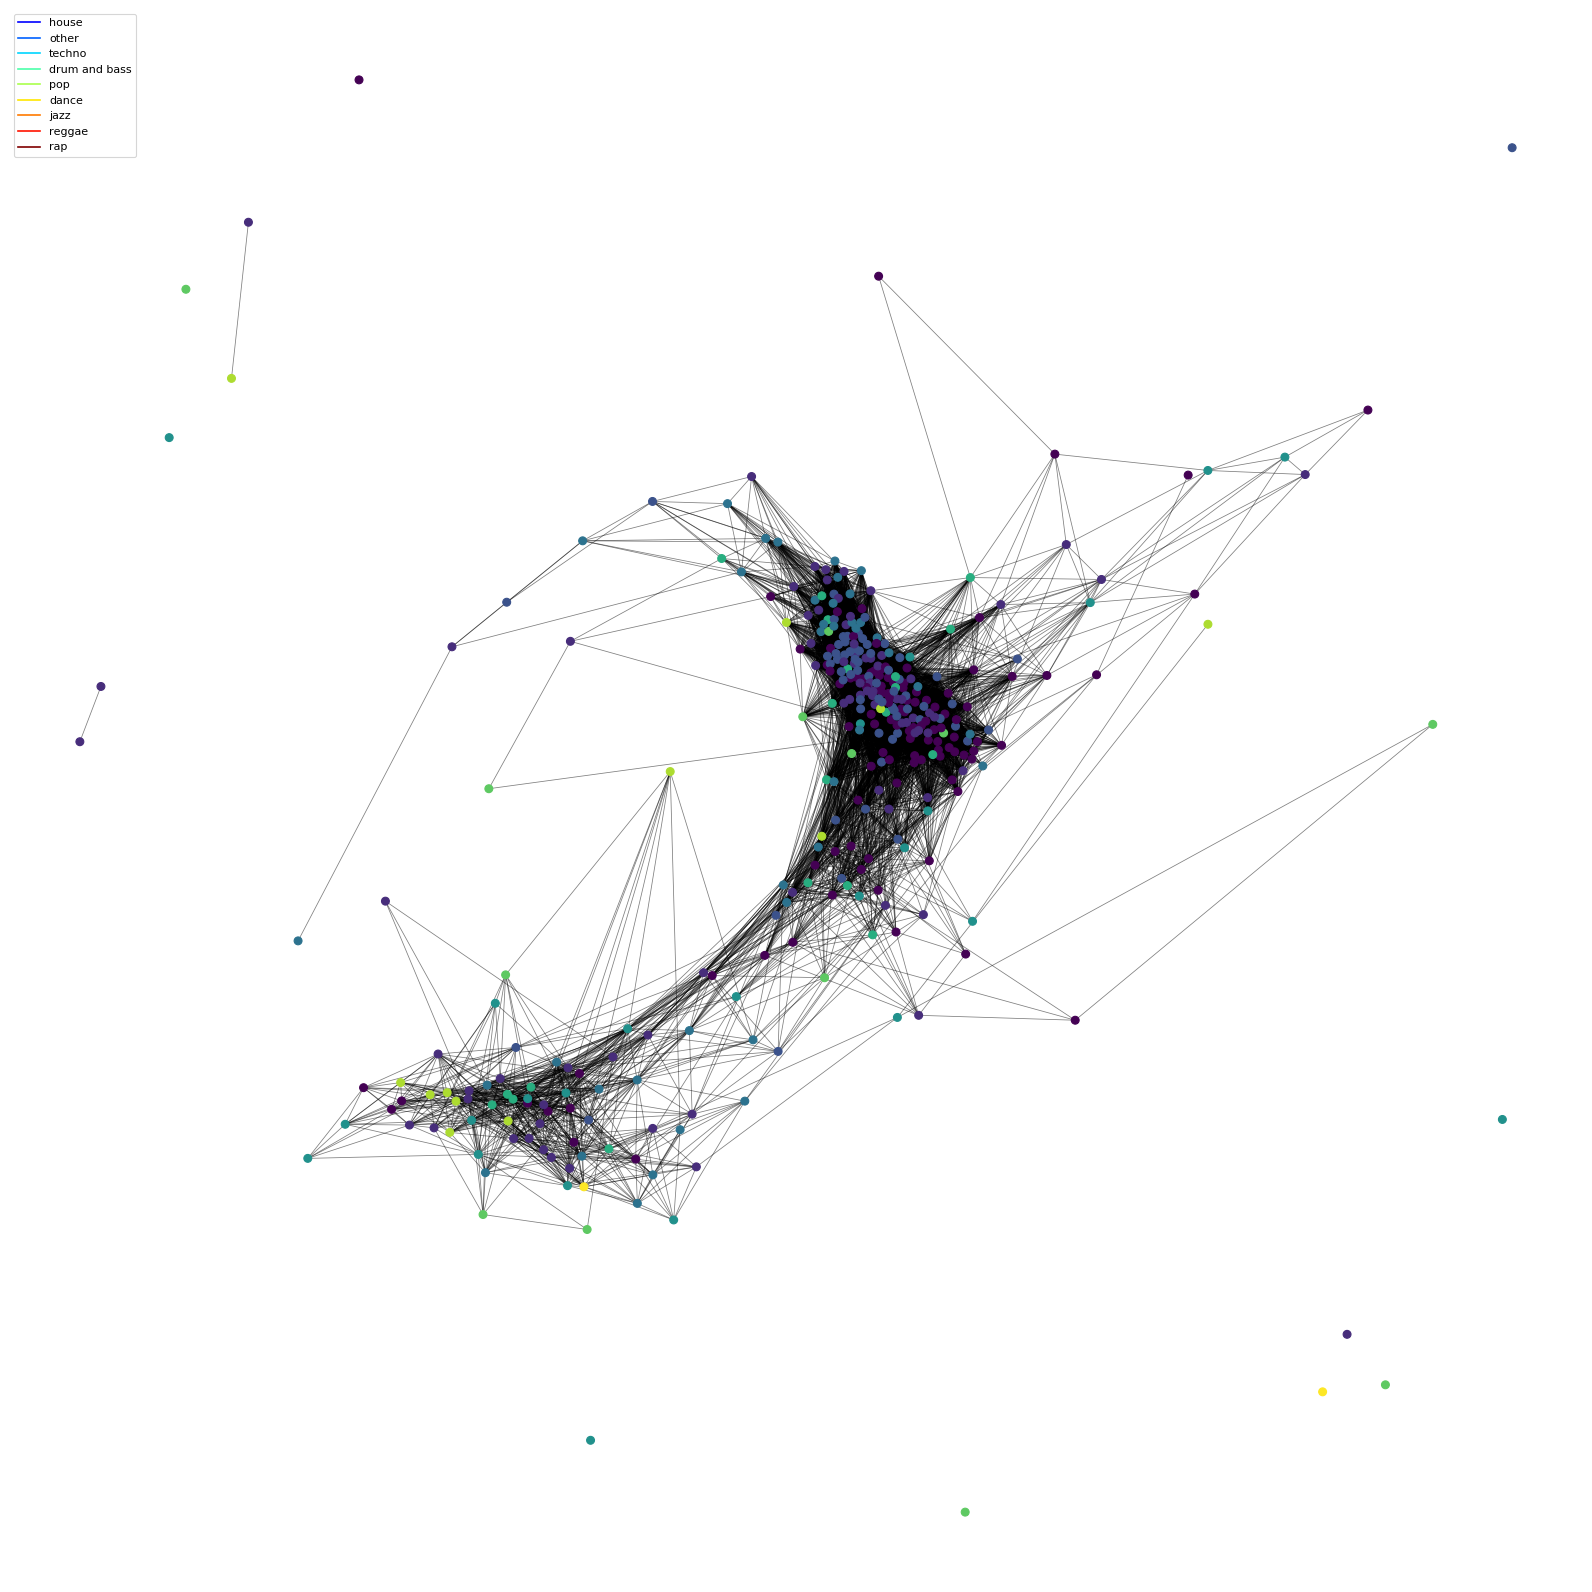

In [63]:
G = nx.Graph()

# color preparation
genre_dict = {principal_genres[i]:i + 1 for i in range(len(principal_genres))}
color_values_nodes = []

for node_index, edges in graph_nodes_edges.items():
    color_values_nodes.append(genre_dict[graph_nodes_song_genres[node_index]])

# Color mapping
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=max(color_values_nodes))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# Using a figure to use it as a parameter when calling nx.draw_networkx
f = plt.figure(1, figsize=(20, 20), dpi=80)
ax = f.add_subplot(1,1,1)
for label in genre_dict:
    ax.plot([0],[0],color=scalarMap.to_rgba(genre_dict[label]),label=label)
    
for node_index, edges in graph_nodes_edges.items():
    if len(edges) == 0:
        G.add_node(node_index)
    for (edge_node_index, distance) in edges:
        G.add_edge(node_index, edge_node_index, weight=node_building_threshold - distance)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=range(len(graph_nodes_edges)), node_size=50, ax=ax, node_color=color_values_nodes)


# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=0.7)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=0.7, alpha=0.5)

# Setting it to how it was looking before.                                                                                                              
plt.axis('off')
f.set_facecolor('w')

plt.legend()

f.tight_layout()
plt.show()


In [65]:
for isolate in nx.isolates(G):
    print(isolate)
    print(f"isolate: {graph_nodes_song_titles[isolate]} with genre: {graph_nodes_song_genres[isolate]}")

11
isolate: Venasque with genre: house
28
isolate: Maddy La Nuit with genre: pop
29
isolate: Blossom Roses with genre: pop
56
isolate: World Without Words with genre: rap
62
isolate: Moonlight Ride with genre: other
74
isolate: Prickly Pear with genre: jazz
94
isolate: The Fade with genre: techno
183
isolate: Mo' Better Blues (feat. Terence Blanchard) with genre: jazz
207
isolate: Malo with genre: pop
285
isolate: Indi Groove with genre: jazz
